In [114]:
import matplotlib.pyplot as plt
import csv
import numpy as np

path_to_log_folder = 'C:\\Data\Personal\\PhD\Sources\\repo\\smart-sensing\\mas-simulation\\sensor-simulation\\log'

In [225]:
def get_sensor_data(name):
    ticks = []
    buffer = []
    roles = []
    #ticks	energyInput	energyConsumed	energyInBuffer	energyAllocated	currentlyPlaying	currentTotalBenefit	

    with open(path_to_log_folder + '\\runtime_sen_'+ name +'.csv','r') as csvfile:
        lines = csv.reader(csvfile, delimiter=';')
        for row in lines:
            #print(len(row))
            if len(row) > 7:
                ticks.append(int(row[0]))
                buffer.append(float(row[3]))
                roles.append(int(row[5]))
    return ticks, buffer, roles

In [226]:
def get_actor_data(name):
    x1 = []
    y1 = []
    y2 = []

    #Ticks	Time	Duration	State	Cycles	Updates	Expected	Reward

    with open('C:\\Data\Personal\\PhD\Sources\\repo\\smart-sensing\\mas-simulation\\sensor-simulation\\log\\runtime_con_'+ name +'.csv','r') as csvfile:
        lines = csv.reader(csvfile, delimiter=';')
        for row in lines:
            #print(len(row))
            if row[0].isnumeric():
                x1.append(int(row[0]))
                y1.append(float(row[5]) / float(row[6]))
                y2.append(float(row[7]))
    return x1,y1,y2

<Figure size 1440x864 with 0 Axes>

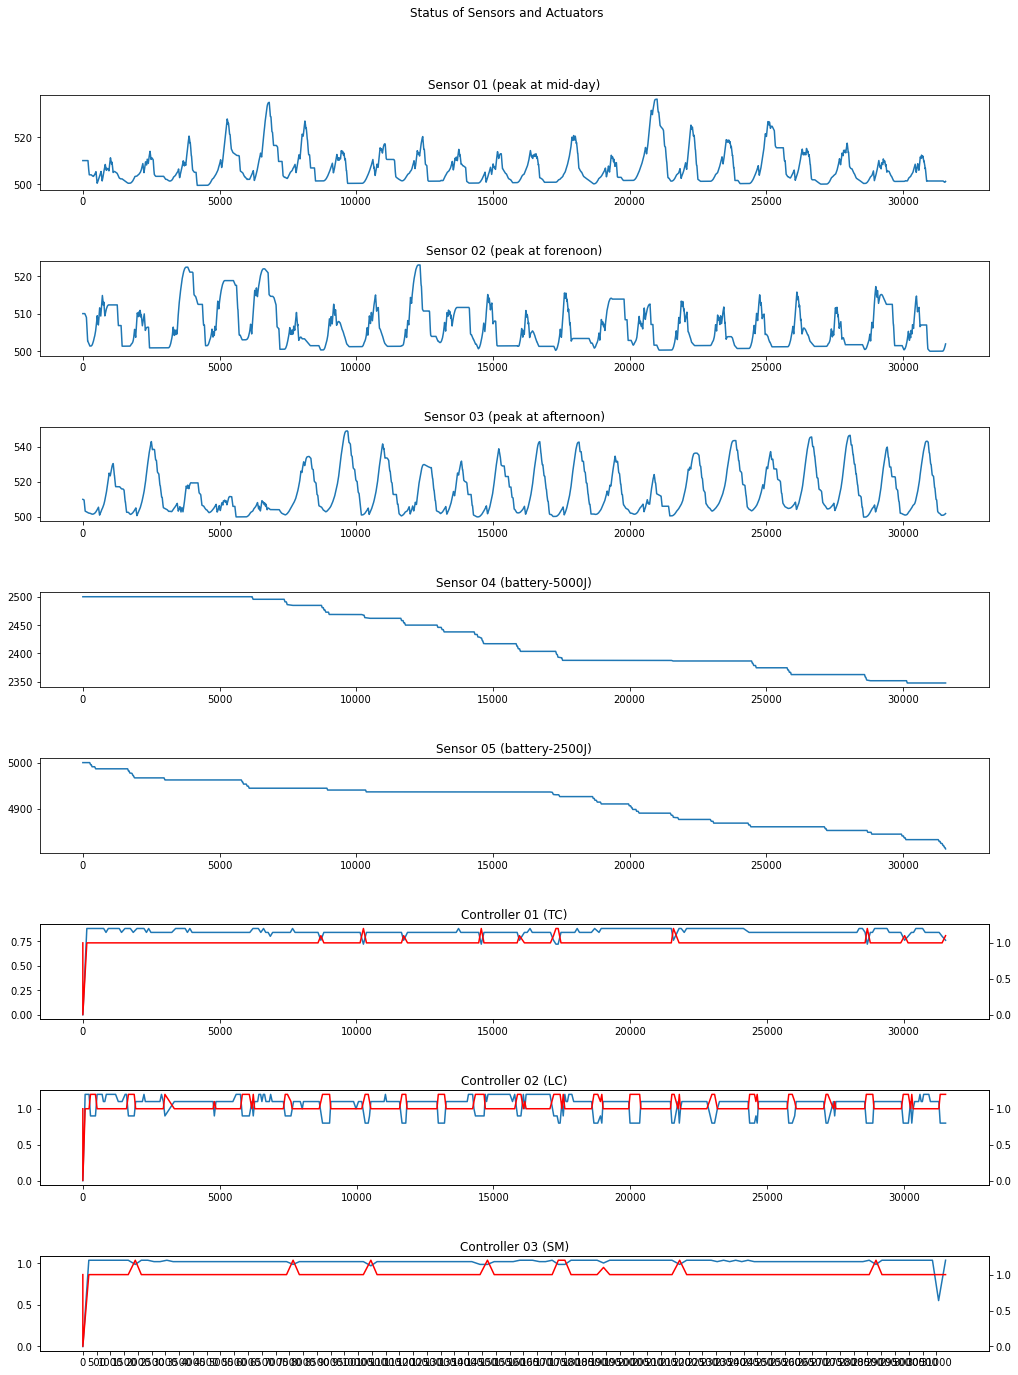

In [242]:

  
x1,y1,y1r = get_sensor_data('sen01')
x2,y2,y2r = get_sensor_data('sen02')
x3,y3,y3r = get_sensor_data('sen03')
x4,y4,y4r = get_sensor_data('sen04')
x5,y5,y5r = get_sensor_data('sen05')

x6,y6,y6r = get_actor_data('con01')
x7,y7,y7r = get_actor_data('con02')
x8,y8,y8r = get_actor_data('con03')

plt.figure(figsize=(20,12))
fig, axs = plt.subplots(8,  figsize=(15, 20))
fig.suptitle('Status of Sensors and Actuators')
fig.tight_layout(pad=5.0)

axs[0].set_title('Sensor 01 (peak at mid-day)')
axs[0].plot(x1,y1)

#axs[0].plot(x1, y1)
axs[1].set_title('Sensor 02 (peak at forenoon)')
axs[1].plot(x2, y2)

axs[2].set_title('Sensor 03 (peak at afternoon)')
axs[2].plot(x3, y3)

axs[3].set_title('Sensor 04 (battery-5000J)')
axs[3].plot(x4, y4)

axs[4].set_title('Sensor 05 (battery-2500J)')
axs[4].plot(x5, y5)

axs[5].set_title('Controller 01 (TC)')
axs[5].plot(x6, y6)
ax52 = axs[5].twinx() 
ax52.plot(x6, y6r, color = 'red')  

axs[6].set_title('Controller 02 (LC)')
axs[6].plot(x7, y7)
ax62 = axs[6].twinx() 
ax62.plot(x7, y7r, color = 'red')  

xticks = np.arange(0, 17000, 500)
axs[7].set_title('Controller 03 (SM)')
axs[7].set_xticks(xticks)
ax72 = axs[7].twinx() 
ax72.plot(x8, y8r, color = 'red')  
axs[7].plot(x8, y8)
#plt.plot(x, y, color = 'g', linestyle = 'dashed',label = "Energy in buffer")
  
plt.xticks(np.arange(min(x8), max(x8)+1.0, 500.0))

plt.show()